In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

os.chdir("../")
from pathlib import Path
import matplotlib.gridspec as gridspec

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [3]:
all_metrics = settings_dict["all_metrics"]

In [4]:
features = pd.read_parquet("data/allfeatures.parquet")
features["class"].value_counts()

class
EB      98473
RRL     45096
DSCT     8245
CEP      1662
Name: count, dtype: int64

In [6]:
colors = ["g-r", "r-i", "i-z"]
features=features.dropna(subset=colors)

In [7]:
features["class"].value_counts()

class
EB      50278
RRL     42698
DSCT     7756
CEP       683
Name: count, dtype: int64

In [8]:
# features = features.groupby("class").sample(n=1660, random_state=seed_val)

## 1. Scatter/histogram b/w individual features

In [9]:
corr_matrix = features.drop(["class"], axis=1).corr()

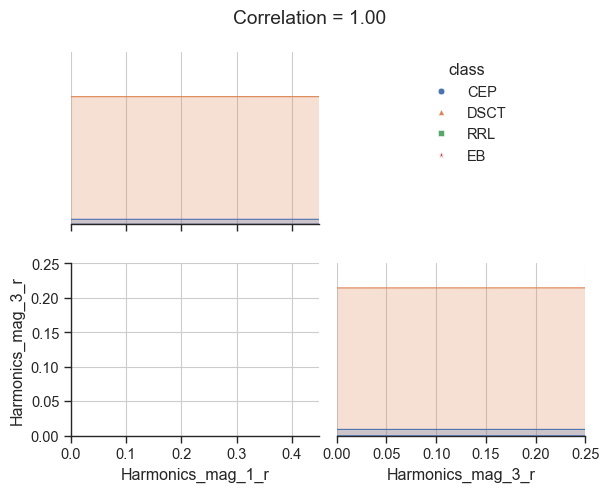

In [10]:
vars_interest = ["Harmonics_mag_1_r", "Harmonics_mag_3_r"]
corr_val = corr_matrix.loc[vars_interest[0], vars_interest[1]]
ax = sns.pairplot(
    features,
    vars=vars_interest,
    hue="class",
    corner=True,
    markers=["o", "^", "s", "*"],
)
plt.suptitle(f"Correlation = {corr_val:.2f}")
plt.tight_layout()
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.675, 0.9))
# https://stackoverflow.com/a/34579525/10743245

var1_lims = (0, 0.45)
var2_lims = (0, 0.25)

ax.axes.ravel()[0].set_xlim(*var1_lims)
ax.axes.ravel()[2].set_xlim(*var1_lims)
ax.axes.ravel()[2].set_ylim(*var2_lims)
ax.axes.ravel()[3].set_xlim(*var2_lims)

plt.show()

In [11]:
corr_thresh = 0.9
corr_matrix = corr_matrix.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype("bool"))
upper = upper[upper >= corr_thresh].dropna(axis=1, how="all")
upper = upper.sort_values(by=list(upper.columns), ascending=False)

In [12]:
lists = []

for idx in upper.index:
    row = upper.loc[idx].dropna()
    ls = sorted(list(row.index) + [row.name])
    lists.append(ls)

In [13]:
# lists = [[1, 3], [3, 5], [5, 6], [7, 8]]
merged = []
for lst in lists:
    for m in merged:
        if any(item in m for item in lst):
            m.extend(lst)
            break
    else:
        merged.append(lst)

merged_alt = []
for m in merged:
    merged_alt.append(list(set(m)))
merged = merged_alt
# print(merged)

In [14]:
for m in merged:
    if len(m) > 1:
        print("\n\t".join(m))
        print("*" * 10)

MHPS_low_g
	MHPS_high_g
**********
MHPS_non_zero_u
	MHPS_non_zero_g
	MHPS_non_zero_z
	MHPS_non_zero_r
	MHPS_non_zero_i
**********
MHPS_low_i
	MHPS_high_i
	ExcessVar_flux_i
**********
Multiband_period
	delta_period_u
**********
Harmonics_mag_4_u
	Harmonics_mag_6_u
	Harmonics_mag_5_u
	Harmonics_mag_3_u
	Harmonics_mag_1_u
	Harmonics_mag_2_u
**********
Harmonics_mag_1_g
	Harmonics_mag_2_g
**********
Harmonics_mag_5_g
	Harmonics_mag_6_g
	Harmonics_mag_3_g
	Harmonics_mag_4_g
	Harmonics_mag_7_g
**********
Harmonics_mag_3_r
	Harmonics_mag_1_r
	Harmonics_mag_6_r
	Harmonics_mag_4_r
	Harmonics_mag_7_r
	Harmonics_mag_5_r
	Harmonics_mag_2_r
**********
Harmonics_mag_4_i
	Harmonics_mag_2_i
	Harmonics_mag_3_i
	Harmonics_mag_7_i
	Harmonics_mag_5_i
	Harmonics_mag_6_i
	Harmonics_mag_1_i
**********
Harmonics_mag_5_z
	Harmonics_mag_4_z
	Harmonics_mag_6_z
	Harmonics_mag_3_z
	Harmonics_mag_7_z
	Harmonics_mag_2_z
	Harmonics_mag_1_z
**********
Harmonics_mag_6_Y
	Harmonics_mag_2_Y
	Harmonics_mag_5_Y
	Harmonics_

In [17]:
choose_corrfeats = []
for m in merged:
    print(m)
    features[m].isna()
    argmin_feat = features[m].isna().sum().argmin()
    feat_chosen = m[argmin_feat]
    choose_corrfeats.append(feat_chosen)
    print(feat_chosen)
    print("*"*20)

['MHPS_low_g', 'MHPS_high_g']
MHPS_low_g
********************
['MHPS_non_zero_u', 'MHPS_non_zero_g', 'MHPS_non_zero_z', 'MHPS_non_zero_r', 'MHPS_non_zero_i']
MHPS_non_zero_r
********************
['MHPS_low_i', 'MHPS_high_i', 'ExcessVar_flux_i']
ExcessVar_flux_i
********************
['Multiband_period', 'delta_period_u']
Multiband_period
********************
['Harmonics_mag_4_u', 'Harmonics_mag_6_u', 'Harmonics_mag_5_u', 'Harmonics_mag_3_u', 'Harmonics_mag_1_u', 'Harmonics_mag_2_u']
Harmonics_mag_4_u
********************
['Harmonics_mag_1_g', 'Harmonics_mag_2_g']
Harmonics_mag_1_g
********************
['Harmonics_mag_5_g', 'Harmonics_mag_6_g', 'Harmonics_mag_3_g', 'Harmonics_mag_4_g', 'Harmonics_mag_7_g']
Harmonics_mag_5_g
********************
['Harmonics_mag_3_r', 'Harmonics_mag_1_r', 'Harmonics_mag_6_r', 'Harmonics_mag_4_r', 'Harmonics_mag_7_r', 'Harmonics_mag_5_r', 'Harmonics_mag_2_r']
Harmonics_mag_3_r
********************
['Harmonics_mag_4_i', 'Harmonics_mag_2_i', 'Harmonics_mag_3_

In [18]:
len(choose_corrfeats)

332

In [19]:
# # manually choose one from each subset
# # edit - choose the one with the highest SNR or the one with the STD
# # alternate programmatic approach - look at diff clusters
# choose_corrfeats = [
#     "median_brightness_before_band_r",
#     "Meanvariance_flux_r",
#     "Period_band_Y",
#     "MHPS_ratio_Y",
#     "Multiband_period",
#     "Harmonics_mag_1_u",
#     "Harmonics_mag_1_g",
#     "Harmonics_mag_1_r",
#     "Harmonics_mag_1_z",
#     "Amplitude_flux_u",
#     "Amplitude_flux_g",
#     "Amplitude_flux_r",
#     "Meanvariance_flux_g",
#     "Amplitude_flux_i",
#     "ExcessVar_flux_i",
#     "Meanvariance_flux_z",
#     "Amplitude_flux_z",
#     "Amplitude_flux_Y",
#     "SPM_t0_r",
#     "Mean_flux_u",
#     "n_forced_phot_band_after_z",
#     "n_forced_phot_band_before_r",
#     "dbrightness_first_det_band_r",
#     "dbrightness_first_det_band_i",
#     "dbrightness_first_det_band_z",
#     "dbrightness_first_det_band_Y",
# ]

In [20]:
bigset = []
for m in merged:
    if len(m) > 1:
        bigset.append(m)
bigset = [item for subset in bigset for item in subset]

drop_corrfeats = list(set(bigset) - set(choose_corrfeats))

In [21]:
import missingno as msno

In [22]:
features[["class"]]

,class
snid,
1067946,CEP
1339295,CEP
2367215,CEP
2497903,CEP
2696180,CEP
...,...
159474435,EB
159480859,EB
159485253,EB


In [23]:
(features.loc[:,colors+choose_corrfeats+["class"]].isna().sum().sort_values(ascending=False)).iloc[:40]

Period_band_u                      101094
Harmonics_chi_u                     99082
dbrightness_first_det_band_u        98413
Harmonics_phase_7_u                 96799
Harmonics_mse_u                     96799
Harmonics_phase_2_u                 96799
Harmonics_phase_3_u                 96799
Harmonics_phase_4_u                 96799
Harmonics_mag_4_u                   96799
Harmonics_phase_5_u                 96799
Harmonics_phase_6_u                 96799
Harmonics_mag_7_u                   96799
MHPS_low_u                          89638
MHPS_ratio_u                        89638
MHPS_PN_flag_u                      89638
max_brightness_before_band_u        86249
median_brightness_before_band_u     86249
median_brightness_before_band_g     85885
last_brightness_before_band_g       85885
max_brightness_before_band_g        85885
dbrightness_forced_phot_band_g      85885
dbrightness_forced_phot_band_Y      85149
dbrightness_first_det_band_r        82743
last_brightness_before_band_r     

In [28]:
smallfeatures

,g-r,r-i,i-z,Multiband_period,Harmonics_mag_3_r,Harmonics_mag_4_i,Harmonics_mag_5_z,SPM_t0_i,positive_fraction_i,g-r,...,SPM_chi_r,SPM_chi_i,SPM_chi_z,positive_fraction_g,positive_fraction_z,Timespan,Coordinate_x,Coordinate_y,Coordinate_z,class
snid,,,,,,,,,,,,,,,,,,,,,
1067946,0.043053,0.302249,0.505749,2.756647,38.344691,361.842877,460.597194,370.847000,0.402597,0.043053,...,15297.128036,27555.013151,34963.948103,0.333333,0.489796,1087.8989,-0.080831,-0.824209,-0.560487,CEP
1339295,0.045803,0.100771,1.001831,9.725289,120.770453,517.366748,1264.258040,259.127048,0.756098,0.045803,...,4508.765291,18453.795446,24684.948363,0.857143,0.666667,1090.1103,-0.404100,0.201771,-0.892184,CEP
2367215,0.372311,0.702908,1.141273,3.656394,201.004891,228.178944,45.483216,305.142670,0.465753,0.372311,...,9962.563445,7829.183235,8050.971551,0.516129,0.600000,1092.9466,-0.273996,-0.449942,-0.849988,CEP
2497903,0.127014,0.377351,0.495092,3.243489,348.141757,447.362672,823.637432,322.426139,0.540541,0.127014,...,20297.863588,21049.103677,37941.852134,0.379310,0.479167,1095.1613,-0.531476,0.110634,-0.839817,CEP
2696180,0.040129,0.210304,0.410839,6.102114,75.369627,163.780482,204.437656,354.063577,0.351351,0.040129,...,3014.122932,10831.289846,8925.254151,0.000000,0.238095,1082.0550,-0.245233,-0.546147,-0.800989,CEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159474435,0.553153,0.868857,1.175119,3.914182,4.331158,6.456358,15.684694,327.177807,0.333333,0.553153,...,96.441347,74.120753,38.223378,0.600000,0.437500,856.7718,0.078472,0.975449,-0.205770,EB
159480859,0.048369,1.069297,1.574302,2.210703,247.325039,310.996761,28.805154,259.208822,0.700000,0.048369,...,992.178166,667.324493,258.078867,1.000000,0.333333,790.0176,0.834702,-0.537956,-0.117802,EB
159485253,0.827747,0.795705,1.318001,0.336486,16.386149,24.011010,7.859460,712.356317,0.888889,0.827747,...,46.939083,37.838254,16.283095,1.000000,0.666667,800.9157,0.557825,0.566545,-0.606513,EB


In [24]:
smallfeatures = features.loc[:,colors+choose_corrfeats+["class"]].dropna(axis=1)

In [27]:
smallfeatures.groupby("class").count()

,g-r,r-i,i-z,Multiband_period,Harmonics_mag_3_r,Harmonics_mag_4_i,Harmonics_mag_5_z,SPM_t0_i,positive_fraction_i,g-r,...,SPM_tau_fall_Y,SPM_chi_r,SPM_chi_i,SPM_chi_z,positive_fraction_g,positive_fraction_z,Timespan,Coordinate_x,Coordinate_y,Coordinate_z
class,,,,,,,,,,,,,,,,,,,,,
CEP,683,683,683,683,683,683,683,683,683,683,...,683,683,683,683,683,683,683,683,683,683
DSCT,7756,7756,7756,7756,7756,7756,7756,7756,7756,7756,...,7756,7756,7756,7756,7756,7756,7756,7756,7756,7756
EB,50278,50278,50278,50278,50278,50278,50278,50278,50278,50278,...,50278,50278,50278,50278,50278,50278,50278,50278,50278,50278
RRL,42698,42698,42698,42698,42698,42698,42698,42698,42698,42698,...,42698,42698,42698,42698,42698,42698,42698,42698,42698,42698


In [ ]:
smallfeatures

In [ ]:
msno.matrix(smallfeatures)

In [ ]:
len(drop_corrfeats)

In [ ]:
# drop_features = (
#     + list(sorted(bad_features))
#     + list(sorted(drop_corrfeats))
# )

# Drop duplicates while preserving order
drop_features = list(dict.fromkeys(drop_corrfeats))